<a href="https://colab.research.google.com/github/DylanCabezas/MachineLearning_Regresion/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Regresión Video Demo

#Integrantes:


*   Dylan Cabezas
*   Elemento de la lista
*   Elemento de la lista




## Regresión Lineal

Creación de Datos Aleatorios

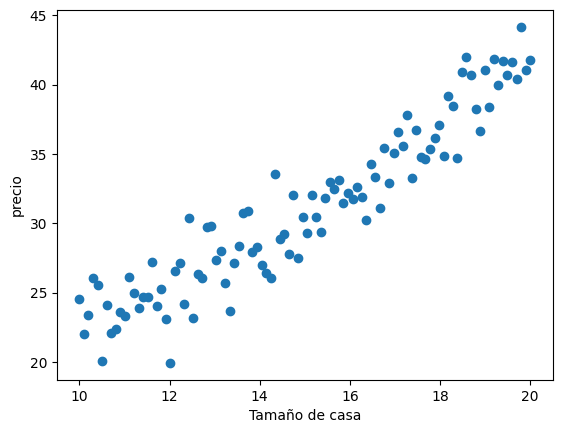

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.linspace(10, 20, 100)
y = 2*X + 1 + np.random.randn(100)*2    # y = 2x + ruido

plt.scatter(X,y)
plt.xlabel("Tamaño de casa")
plt.ylabel("precio")
plt.show()

Entrenar el modelo lineal

Pendiente: 2.0569700250855774
Intercepto: 0.19935399005205645


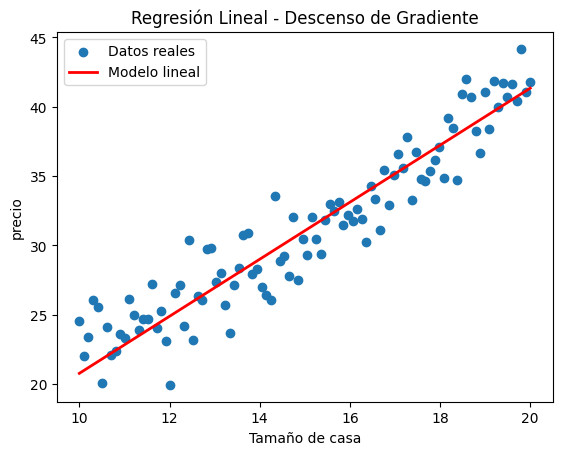

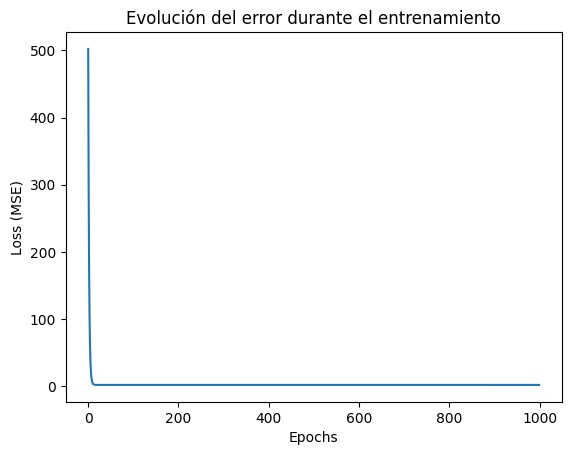

In [ ]:
# Inicialización de parámetros

m = 0.0
b = 0.0

lr = 0.001
epochs = 1000
n = len(X)

losses = []


## Función de Pérdida

for epoch in range(epochs):
    y_pred = m * X + b
    error = y_pred - y

    # Función de pérdida (MSE)
    loss = (1/(2*n)) * np.sum(error**2)
    losses.append(loss)

    # Derivadas
    dm = (1/n) * np.sum(error * X)
    db = (1/n) * np.sum(error)

    # Actualización de parámetros
    m = m - lr * dm
    b = b - lr * db

print("Pendiente:", m)
print("Intercepto:", b)

# Visualización
plt.scatter(X, y, label="Datos reales")
plt.plot(X, m*X + b, color="red", linewidth=2, label="Modelo lineal")
plt.title("Regresión Lineal - Descenso de Gradiente")
plt.xlabel("Tamaño de casa")
plt.ylabel("precio")
plt.legend()
plt.show()

# Evolución del error
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Evolución del error durante el entrenamiento")
plt.show()


# Guardamos valores
m_lineal = m
b_lineal = b


## Regresión No Lineal

Creación de Datos polinomiales

Primeras 5 filas de Phi:
[[  10.          100.         1000.        ]
 [  10.1010101   102.03040506 1030.61015213]
 [  10.2020202   104.0812162  1061.83867035]
 [  10.3030303   106.15243343 1093.69173832]
 [  10.4040404   108.24405673 1126.1755397 ]]


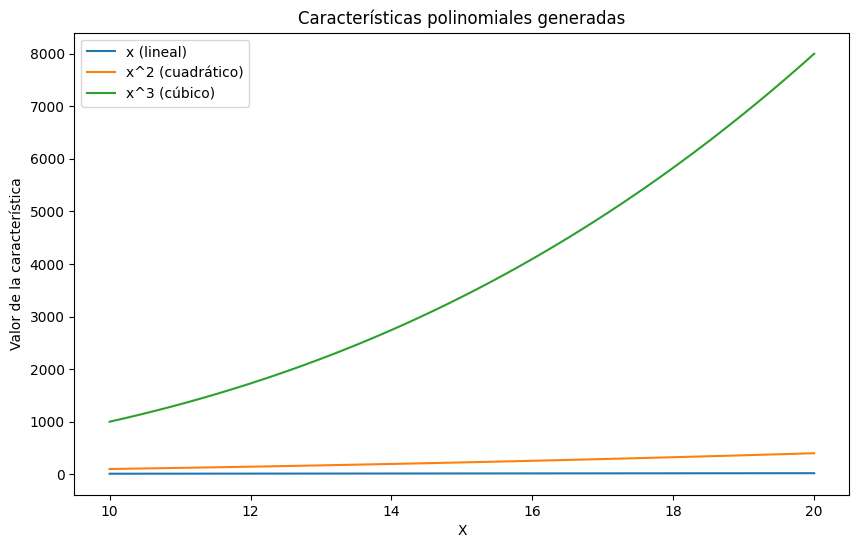

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Datos
X = np.linspace(10, 20, 100)
y = 2*X + 1 + np.random.randn(100)*2

# Construir matriz de características polinomiales (grado p)
p = 3
Phi = np.vstack([X**j for j in range(1, p+1)]).T
n = len(X)

# Mostrar las primeras filas de Phi
print("Primeras 5 filas de Phi:")
print(Phi[:5])

# Graficar cada columna de Phi
plt.figure(figsize=(10,6))
plt.plot(X, Phi[:,0], label="x (lineal)")
plt.plot(X, Phi[:,1], label="x^2 (cuadrático)")
plt.plot(X, Phi[:,2], label="x^3 (cúbico)")
plt.xlabel("X")
plt.ylabel("Valor de la característica")
plt.title("Características polinomiales generadas")
plt.legend()
plt.show()


Normalización

Primeras 5 filas de Phi normalizado:
[[-1.71481604 -1.52047291 -1.35061438]
 [-1.68017329 -1.49734829 -1.33562204]
 [-1.64553055 -1.47399126 -1.32032684]
 [-1.6108878  -1.45040182 -1.30472574]
 [-1.57624505 -1.42657997 -1.28881572]]


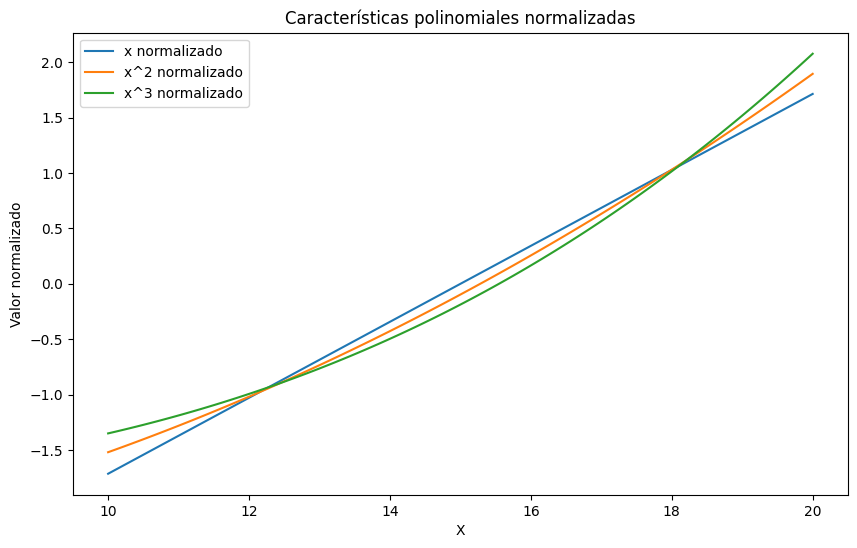

In [ ]:
  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler()
  Phi_scaled = scaler.fit_transform(Phi)

  # Mostrar primeras filas normalizadas
  print("Primeras 5 filas de Phi normalizado:")
  print(Phi_scaled[:5])

  # Graficar cada columna normalizada
  plt.figure(figsize=(10,6))
  plt.plot(X, Phi_scaled[:,0], label="x normalizado")
  plt.plot(X, Phi_scaled[:,1], label="x^2 normalizado")
  plt.plot(X, Phi_scaled[:,2], label="x^3 normalizado")
  plt.xlabel("X")
  plt.ylabel("Valor normalizado")
  plt.title("Características polinomiales normalizadas")
  plt.legend()
  plt.show()



Hipótesis y Entrenamiento

Coeficientes w: [1.66254026 1.91515547 2.14044831]
Intercepto b: 31.11827255842597


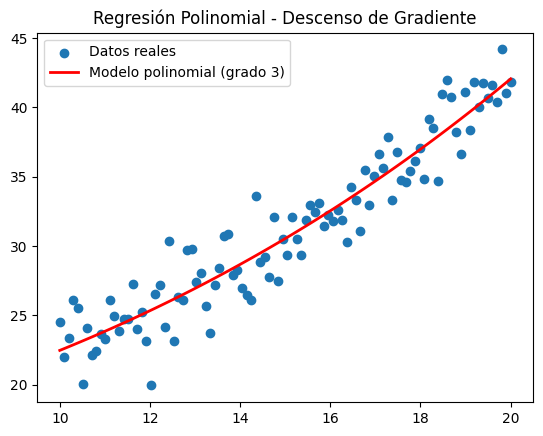

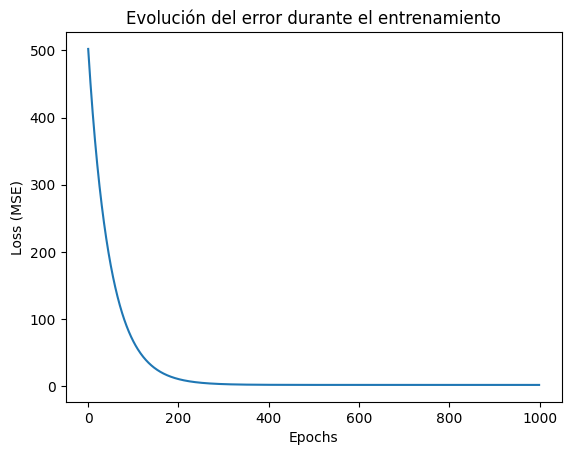

In [ ]:
# Inicialización de parámetros
w = np.zeros(p)
b = 0.0

# Configuración de entrenamiento
lr = 0.01         # tasa de aprendizaje
epochs = 1000
n = len(X)
losses = []


## Función de Pérdida

for epoch in range(epochs):
    # Hipótesis
    y_pred = Phi_scaled @ w + b
    error = y_pred - y

    # Pérdida
    loss = (1/(2*n)) * np.sum(error**2)
    losses.append(loss)

    # Derivadas
    dw = (1/n) * (Phi_scaled.T @ error)
    db = (1/n) * np.sum(error)

    # Actualización
    w -= lr * dw
    b -= lr * db

print("Coeficientes w:", w)
print("Intercepto b:", b)

# Ajuste del modelo
plt.scatter(X, y, label="Datos reales")
plt.plot(X, Phi_scaled @ w + b, color="red", linewidth=2, label=f"Modelo polinomial (grado {p})")
plt.title("Regresión Polinomial - Descenso de Gradiente")
plt.legend()
plt.show()

# Evolución del error
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Evolución del error durante el entrenamiento")
plt.show()

Métricas de calidad

Modelo lineal:
  MSE: 4.1528
  R²:  0.8848
  R² ajustado: 0.8836

Modelo polinomial:
  MSE: 3.4820
  R²:  0.9034
  R² ajustado: 0.9004


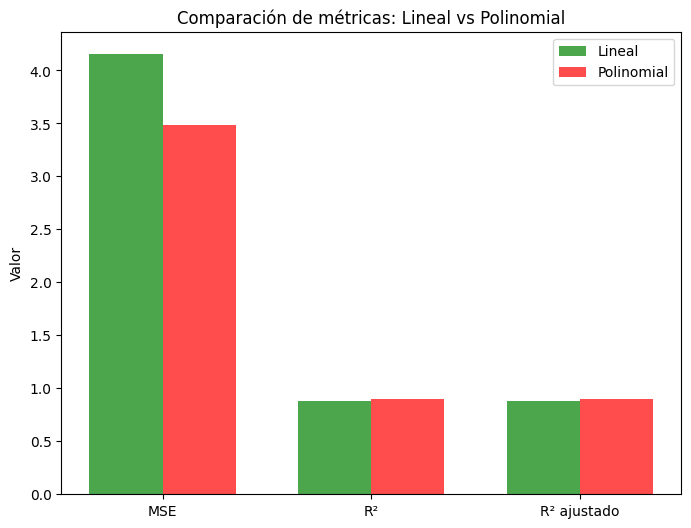

In [ ]:
# Predicciones
y_lineal = m_lineal * X + b_lineal
y_poly   = Phi_scaled @ w + b

# MSE
mse_lineal = np.mean((y - y_lineal)**2)
mse_poly   = np.mean((y - y_poly)**2)

# R²
ss_tot = np.sum((y - np.mean(y))**2)
r2_lineal = 1 - np.sum((y - y_lineal)**2) / ss_tot
r2_poly   = 1 - np.sum((y - y_poly)**2) / ss_tot

# R² ajustado
p_lineal = 1
p_poly   = p
r2_adj_lineal = 1 - (1 - r2_lineal) * ((n - 1) / (n - p_lineal - 1))
r2_adj_poly   = 1 - (1 - r2_poly)   * ((n - 1) / (n - p_poly   - 1))

print("Modelo lineal:")
print(f"  MSE: {mse_lineal:.4f}")
print(f"  R²:  {r2_lineal:.4f}")
print(f"  R² ajustado: {r2_adj_lineal:.4f}")

print("\nModelo polinomial:")
print(f"  MSE: {mse_poly:.4f}")
print(f"  R²:  {r2_poly:.4f}")
print(f"  R² ajustado: {r2_adj_poly:.4f}")




# --- Gráfico comparativo ---
labels = ["MSE", "R²", "R² ajustado"]
lineal_vals = [mse_lineal, r2_lineal, r2_adj_lineal]
poly_vals   = [mse_poly, r2_poly, r2_adj_poly]

x = np.arange(len(labels))  # posiciones
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, lineal_vals, width, label="Lineal", color="green", alpha=0.7)
plt.bar(x + width/2, poly_vals, width, label="Polinomial", color="red", alpha=0.7)

plt.xticks(x, labels)
plt.ylabel("Valor")
plt.title("Comparación de métricas: Lineal vs Polinomial")
plt.legend()
plt.show()



## Comparación de Modelos

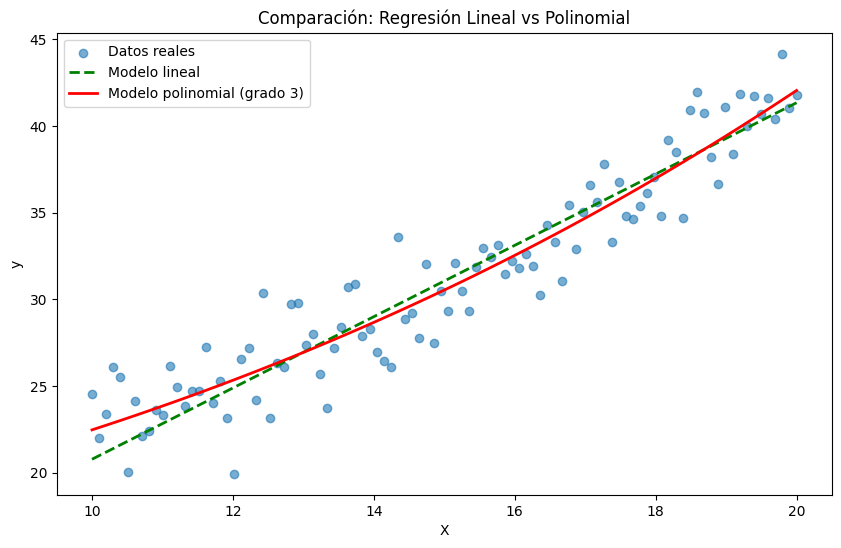

In [ ]:
# Modelos
y_lineal = m_lineal * X + b_lineal
y_poly   = Phi_scaled @ w + b


# Gráfico comparativo
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Datos reales", alpha=0.6)
plt.plot(X, y_lineal, color="green", linestyle="--", linewidth=2, label="Modelo lineal")
plt.plot(X, y_poly, color="red", linewidth=2, label=f"Modelo polinomial (grado {p})")
plt.title("Comparación: Regresión Lineal vs Polinomial")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

